<a href="https://colab.research.google.com/github/jihye-kim11/AI_project/blob/master/ai_sc11x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요.


In [ ]:
data1='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv'
data2='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv'
data3='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv'

In [ ]:
import pandas as pd
df1=pd.read_csv(data1)
df1=df1.drop('Unnamed: 0',axis=1)
df1

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0
...,...,...,...
9569,zwe,2015,12757410.0
9570,zwe,2016,12878926.0
9571,zwe,2017,14092104.0
9572,zwe,2018,12908992.0


In [ ]:
df1.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [ ]:
df2=pd.read_csv(data2)
df2=df2.drop('Unnamed: 0',axis=1)
df2

,geo,time,population
0,abw,1950,38068
1,abw,1951,38267
2,abw,1952,38964
3,abw,1953,40148
4,abw,1954,41760
...,...,...,...
35329,zwe,2096,30940779
35330,zwe,2097,30952209
35331,zwe,2098,30959811
35332,zwe,2099,30964041


In [ ]:
df2.isnull().sum()

geo           0
time          0
population    0
dtype: int64

In [ ]:
df3=pd.read_csv(data3)
df3=df3.drop('Unnamed: 0',axis=1)
df3

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla
...,...,...
268,yem_south,South Yemen (former)
269,yug,Yugoslavia
270,zaf,South Africa
271,zmb,Zambia


In [ ]:
df3.isnull().sum()

geo        0
country    0
dtype: int64

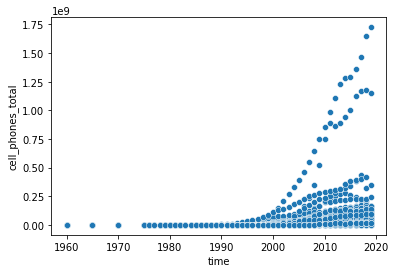

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.scatterplot(x='time',y='cell_phones_total',data=df1)

### 2. Join data

다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|


In [ ]:
df=df1.merge(df2,how='inner',on=['geo','time'])

In [ ]:
df=df.merge(df3,how='inner',on=['geo'])
print(df.shape)

(9568, 5)


In [ ]:
df.head()

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba


### 3. Feature Engineering

인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 

그 결과로 2019년 한국에서 PPP가 1.3448이 나와야 합니다. (해당 내역을 보여주세요.)

In [ ]:

df['PPP']=df['cell_phones_total']/df['population']
df.head()

,geo,time,cell_phones_total,population,country,PPP
0,abw,1960,0.0,54211,Aruba,0.0
1,abw,1965,0.0,57360,Aruba,0.0
2,abw,1970,0.0,59063,Aruba,0.0
3,abw,1975,0.0,60657,Aruba,0.0
4,abw,1976,0.0,60586,Aruba,0.0


In [ ]:
is_now=df['time']==2019
is_korea=df['geo']=='kor'
result=df[is_now & is_korea]
result

,geo,time,cell_phones_total,population,country,PPP
4805,kor,2019,68892541.0,51225308,South Korea,1.344893


### 4. Data Manipulation

각 나라별로 평균 PPP를 계산하세요.

In [ ]:
df=df.groupby(['country'],as_index=False).mean()

가장 많은 PPP 값을 갖는 top 10 country 를 구하세요.

다음과 비슷한 결과가 나와야 합니다. 

|country|PPP|
|:-:|:-:|
|are|0.741916|
|sau|0.757034|
|lie|0.806225|
|hkg|0.810664|
|mac|0.818130|
|isr|0.840197|
|srb|0.951586|
|nld_curacao|1.259227|
|mne|1.574349|
|sxm|1.899506|


In [ ]:
df_top=df.sort_values(by='PPP')
df_top=df_top[-10:]
df_top

,country,time,cell_phones_total,population,PPP
201,United Arab Emirates,2000.500000,5.769268e+06,4.642107e+06,0.741916
163,Saudi Arabia,2004.500000,2.194959e+07,2.432166e+07,0.757034
109,Liechtenstein,2007.695652,2.919700e+04,3.526630e+04,0.806225
85,"Hong Kong, China",1995.000000,5.685863e+06,5.949141e+06,0.810664
112,"Macao, China",1994.489362,4.572911e+05,3.933274e+05,0.818130
93,Israel,2004.500000,6.042948e+06,6.533353e+06,0.840197
165,Serbia,2011.500000,8.525243e+06,8.975920e+06,0.951586
49,Curaçao,2013.500000,1.962895e+05,1.562555e+05,1.259227
127,Montenegro,2011.500000,9.830479e+05,6.237021e+05,1.574349
169,Sint Maarten (Dutch part),2012.000000,6.884000e+04,3.624100e+04,1.899506


In [ ]:
df_ans=df_top.set_index('country',drop=True)
df_ans=df_ans.drop('cell_phones_total',axis=1)
df_ans=df_ans.drop('population',axis=1)
df_ans=df_ans.drop('time',axis=1)
df_ans

,PPP
country,
United Arab Emirates,0.741916
Saudi Arabia,0.757034
Liechtenstein,0.806225
"Hong Kong, China",0.810664
"Macao, China",0.818130
Israel,0.840197
Serbia,0.951586
Curaçao,1.259227
Montenegro,1.574349


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>



여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


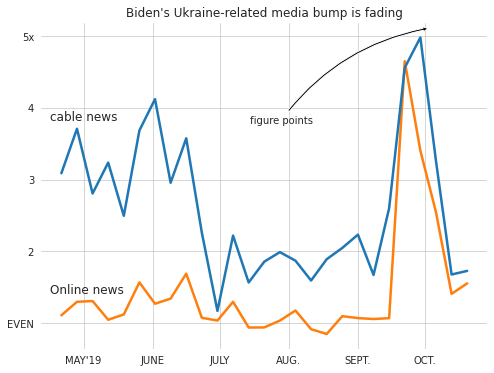

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

fig,ax=plt.subplots(figsize=(8,6))
sns.set_style("whitegrid")#5가지 기본 제공 테마 darkgrid, whitegrid, dark, white, ticks
ax1=sns.lineplot(x='date',y='biden_online_multiple',data=data_for_graph,lw=2.5,color='#ff7f0e')
ax2=sns.lineplot(x='date',y='biden_cable_multiple',data=data_for_graph,lw=2.5,color='#1f77b4')
plt.title("Biden's Ukraine-related media bump is fading")
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
#ax.annotate('annotate', xy=(0.3, 0.2), xytext=(0.1, 0.1), transform=ax.transAxes)
#ax.annotate('annotate - xytext(0.1,0.1)', xy=(0.2, 0.5), xytext=(0.1, 0.1) )
sns.despine(left=True, bottom=True) #테두리 제거
ax.text(x=0.02, y=0.17, s='Online news', fontsize=12, transform=ax.transAxes)
ax.text(x=0.02, y=0.7, s='cable news', fontsize=12, transform=ax.transAxes)
ax.annotate('figure points',xy=(430, 345),xytext=(250,250),size=10, xycoords='figure points',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=-0.2",facecolor='black'), transform=ax.transAxes)


ax.set_yticklabels(['','EVEN', '2', '3', '4', '5x'])#라벨 이름 재설정
ax.set_xticklabels(["MAY'19","JUNE","JULY","AUG.","SEPT.","OCT."])#라벨 이름 재설정
#ax.annotate('figure points',xy=(300, 340), xycoords='figure points',arrowprops=dict(facecolor='black', shrink=0.1), transform=ax.transAxes)


plt.show()

Text(0.5, 1.0, "Biden's Ukraine-related media bump is fading")

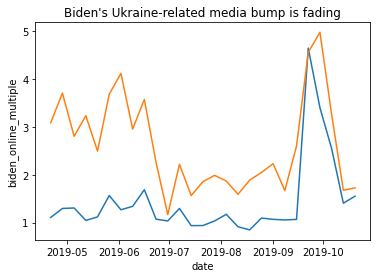

In [ ]:
sns.lineplot(x='date',y='biden_online_multiple',data=data_for_graph)
sns.lineplot(x='date',y='biden_cable_multiple',data=data_for_graph)
plt.title("Biden's Ukraine-related media bump is fading")

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들중 하나를 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## 1. Data Preprocessing

- `cell_phones`dataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요. 

- geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요. 

- 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 
미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?

## 2. EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 


In [ ]:
data1='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv'
data2='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv'
data3='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv'

import pandas as pd
df1=pd.read_csv(data1)
df1=df1.drop('Unnamed: 0',axis=1)
df2=pd.read_csv(data2)
df2=df2.drop('Unnamed: 0',axis=1)
df3=pd.read_csv(data3)
df3=df3.drop('Unnamed: 0',axis=1)
df=df1.merge(df2,how='inner',on=['geo','time'])
df=df.merge(df3,how='inner',on=['geo'])
df['PPP']=df['cell_phones_total']/df['population']

**cell_phonesdataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요.**

In [ ]:
df_s1=df[df['geo']=='chn']
df_s2=df[df['geo']=='usa']
df_s=pd.concat([df_s1,df_s2])

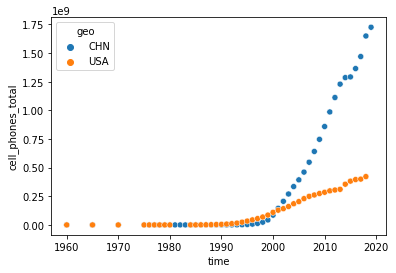

In [ ]:
sns.scatterplot(x='time',y='cell_phones_total',hue='geo',data=df_s)

**geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요.**

In [ ]:
#upper 변환
def up(s):
  return s.upper()

In [ ]:
df_s['geo']=df_s['geo'].apply(up)
df_s

,geo,time,cell_phones_total,population,country,PPP
1627,CHN,1960,0.0,660408056,China,0.000000
1628,CHN,1965,0.0,724218968,China,0.000000
1629,CHN,1970,0.0,827601394,China,0.000000
1630,CHN,1975,0.0,926240885,China,0.000000
1631,CHN,1976,0.0,942685411,China,0.000000
...,...,...,...,...,...,...
9033,USA,2014,355500000.0,318673411,United States,1.115562
9034,USA,2015,382307000.0,320878310,United States,1.191439
9035,USA,2016,396000000.0,323015995,United States,1.225945
9036,USA,2017,400000000.0,325084756,United States,1.230448


# **2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?**:답 2015년

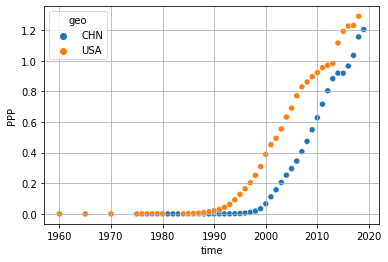

In [ ]:
sns.scatterplot(x='time',y='PPP',hue='geo',data=df_s)
plt.grid(True)
plt.show()

**2. EDA
주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요**